# Zomato - Bengaluru Analysis

This is a Data Analysis project where I try to gather some insights regarding the restuarants in bengaluru like what % of hotels accept online, top 10 restuaratns, and etc. The dataset was obtained from kaggle and contains 50000 rows and 17 columns, making it a fairly large dataset to gather some useful insights.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

# Loading the Dataset

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./zomato-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './zomato-dataset'

In [5]:
import os
os.listdir(data_dir)

['zomato.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Zomato-bengaluru-Analysis"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manishmv/zomato-bengaluru-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manishmv/zomato-bengaluru-analysis


'https://jovian.com/manishmv/zomato-bengaluru-analysis'

In [10]:
import pandas as pd

In [11]:
raw_df = pd.read_csv(data_dir + '/zomato.csv')

In [12]:
raw_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data preparation & cleaning

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [14]:
raw_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
raw_df.shape

(51717, 17)

In [16]:
#checking NAN Sum
raw_df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [17]:
#checking duplicate Values
raw_df.duplicated().sum()

0

In [18]:
raw_df.drop_duplicates(inplace=True)

In [19]:
raw_df.dropna(inplace=True)

In [20]:
raw_df.isna().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [21]:
raw_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [22]:
#removing unwanted columns

columns_to_drop = ['phone', 'menu_item', 'reviews_list']
df = raw_df.drop(columns_to_drop, axis=1)

In [23]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
import jovian

In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manishmv/zomato-bengaluru-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manishmv/zomato-bengaluru-analysis


'https://jovian.com/manishmv/zomato-bengaluru-analysis'

# Data Visualisation & Analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [88]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#sns.set_style('darkgrid')
#matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (9, 5)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Restaurants delivering Online or not ?

In [27]:
#Number of restuarants accepting online orders

counts = df['online_order'].value_counts()

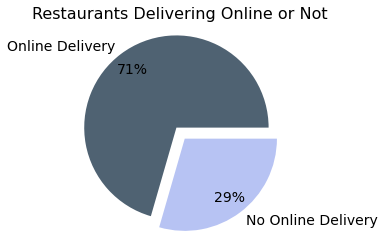

In [28]:
labels = ['Online Delivery', 'No Online Delivery']
sizes = [counts['Yes'], counts['No']]

colors = ['#4F6272', '#B7C3F3']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', pctdistance=0.8,
                          labeldistance=1.1,  textprops={'color': 'black', 'fontsize': 14},explode=[0.15, 0])


# Add a title with larger font size
plt.title('Restaurants Delivering Online or Not', fontsize=16)


# Set the aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

# Restaurants allowing table booking or no ?

In [29]:
booking = df['book_table'].value_counts()

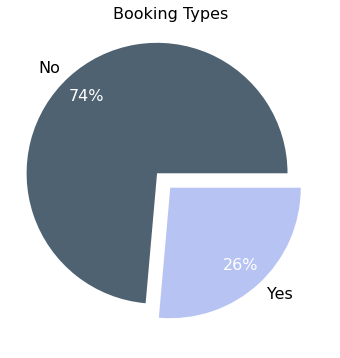

In [30]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(6, 6)

colors = ['#4F6272', '#B7C3F3']

# Create the pie chart
_, _, autotexts = plt.pie(booking.values, labels=booking.index, autopct='%1.0f%%', pctdistance=0.8,
                          labeldistance=1.1, textprops={'fontsize': 16}, explode=[0.15, 0], colors=colors)

# Set the color of the text inside the pie chart to white
for text in autotexts:
    text.set_color('white')

plt.title('Booking Types', fontsize=16)

plt.show()

# Number of Restuarants in each category type

In [31]:
df['listed_in(type)'].nunique()

7

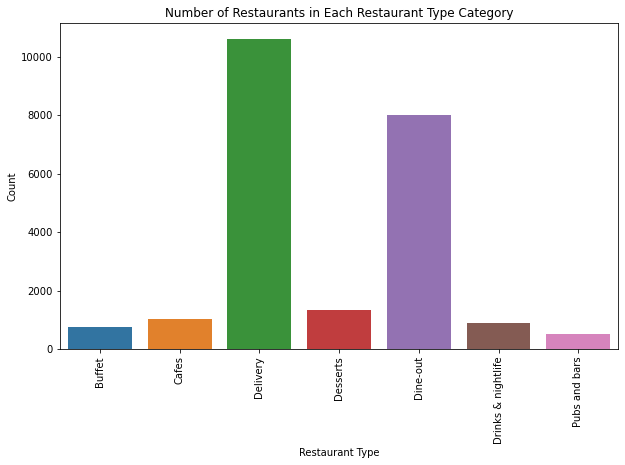

In [32]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='listed_in(type)')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.title('Number of Restaurants in Each Restaurant Type Category')



# Display the plot
plt.show()

# Number of restuarants in top 10 locations

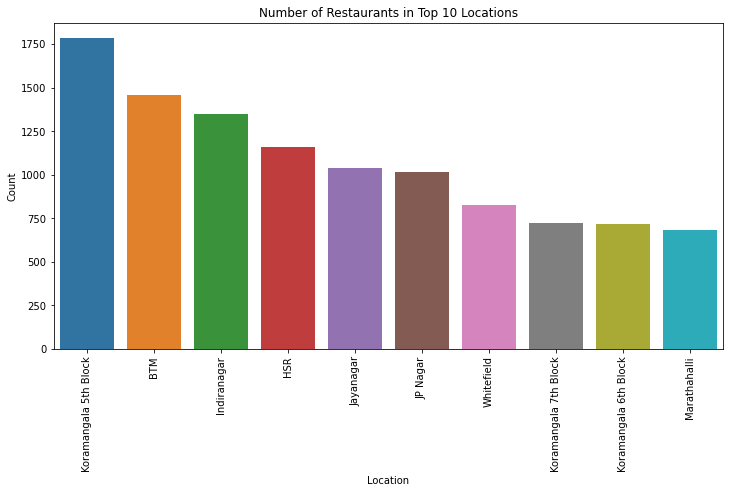

In [33]:
plt.figure(figsize=(12, 6))
top_10_locations = df['location'].value_counts().nlargest(10)
sns.countplot(data=df, x='location', order=top_10_locations.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Number of Restaurants in Top 10 Locations')
plt.show()


Let us save and upload our work to Jovian before continuing

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manishmv/zomato-bengaluru-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manishmv/zomato-bengaluru-analysis


'https://jovian.com/manishmv/zomato-bengaluru-analysis'

# Asking and Answering Questions

#### Some interesting questions that can be asked and answered using the dataset to gather useful insights.



### Q1: What is the average rating of restaurants that offer online ordering versus those that do not?

In [72]:
df['rate'].fillna(0, inplace=True)  # Replace NaN values with 0 temporarily

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert the column to numeric

mean_rate = df['rate'].mean()  # Calculate the mean value

df['rate'].replace(to_replace=0, value=mean_rate, inplace=True)  # Replace 0 with the mean value


In [75]:

# Calculate the average rating for restaurants with online ordering
avg_rating_online = df[df['online_order'] == 'Yes']['rate'].mean()

# Calculate the average rating for restaurants without online ordering
avg_rating_no_online = df[df['online_order'] == 'No']['rate'].mean()


print('Average rating for restaurants with online ordering: {:.1f}'.format(avg_rating_online))

print('Average rating for restaurants without online ordering: {:.1f}'.format(avg_rating_no_online))


Average rating for restaurants with online ordering: 3.9
Average rating for restaurants without online ordering: 3.9


### Q2: Which location has the highest number of highly-rated restaurants (rating >= 4.5)?

In [79]:
# Filter the dataset for highly-rated restaurants
highly_rated_restaurants = df[df['rate'] >= 4.5]

# Count the occurrences of each location in highly-rated restaurants
location_counts = highly_rated_restaurants['location'].value_counts()


In [80]:
print('Location with the highest number of highly-rated restaurants:', location_counts.idxmax())

Location with the highest number of highly-rated restaurants: Koramangala 5th Block


### Q3: How many restaurants in Bengaluru offer online ordering and table booking?

In [81]:
# Count the occurrences of online ordering and table booking
online_order_count = df['online_order'].value_counts()
book_table_count = df['book_table'].value_counts()

# Display the counts
print('Number of restaurants offering online ordering:', online_order_count['Yes'])
print('Number of restaurants offering table booking:', book_table_count['Yes'])


Number of restaurants offering online ordering: 16358
Number of restaurants offering table booking: 6122


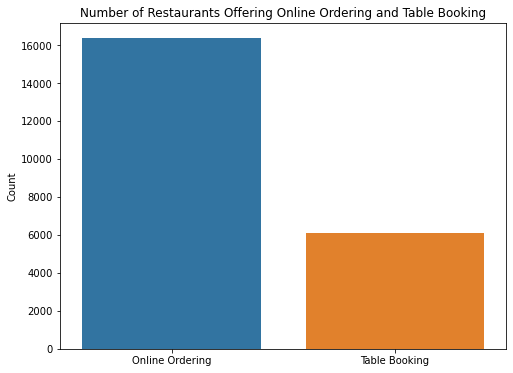

In [83]:
counts = pd.DataFrame({'Feature': ['Online Ordering', 'Table Booking'],
                       'Count': [online_order_count['Yes'], book_table_count['Yes']]})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Feature', y='Count', data=counts)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Number of Restaurants Offering Online Ordering and Table Booking')
plt.show()

### Q4: Which locations have the highest average cost for two people?

In [85]:
# Remove non-numeric characters from 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

# Convert 'approx_cost(for two people)' column to numeric type
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Calculate the average cost for two people in each location
avg_cost_by_location = df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)

# Display the locations with the highest average cost
top_locations = avg_cost_by_location.head(5)
print(top_locations)


location
Sankey Road         2802.941176
MG Road             1465.016779
Lavelle Road        1425.505618
Race Course Road    1284.000000
Infantry Road       1187.368421
Name: approx_cost(for two people), dtype: float64


Let us save and upload our work to Jovian before continuing.

In [89]:
import jovian

In [90]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manishmv/zomato-bengaluru-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manishmv/zomato-bengaluru-analysis


'https://jovian.com/manishmv/zomato-bengaluru-analysis'